<a href="https://colab.research.google.com/github/SergioPGJunior/StarWars-wordcloud/blob/master/episodev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
#Abrir o arquivo com as legendas do filme em Inglês, obtidas no site opensubtitles
with open("/content/drive/My Drive/legendas star wars/StarWarsEpisodeV.srt","r") as file:
  legendas = file.read()

In [65]:
#O arquivo possui números que indicam as ordens e tempos das falas.
#Esse bloco é responsável por criar um conjunto com todos esses núemros com o objetivo de excluí-los na sequência

import re

numbers = re.findall(r'\d{1,}', legendas)
numbers = set(numbers)

In [66]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

#Divide strings em lista de palavras baseadas em um padrão específico utilizando Regexp
tokenizer = RegexpTokenizer(r'\w+')

l = tokenizer.tokenize(legendas.lower())
palavras = [w for w in l if w not in numbers]

In [67]:
#Excluir palavras muito comuns
nltk.download('stopwords')

words = [w for w in palavras if w not in stopwords.words('english')]
len(words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


3858

In [68]:
#Calcular a frequência de cada palvra
from nltk.probability import FreqDist

fdist = FreqDist(words)

fdist.pprint()

FreqDist({'yes': 40, 'oh': 40, 'sir': 40, 'right': 38, 'know': 36, 'get': 35, 'good': 33, 'r2': 30, 'see': 29, 'come': 29, ...})


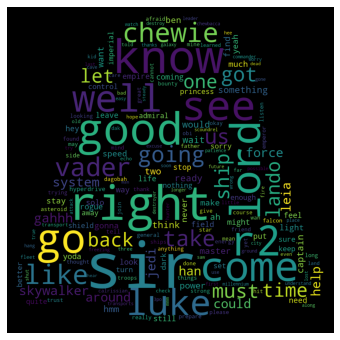

In [71]:
#Gerar a wordcloud
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np

fdist.pop("yes")
fdist.pop("oh")
fdist.pop("get")

# lista de stopword
stopwords = set(STOPWORDS)


mask = np.array(Image.open("/content/drive/My Drive/Placa-Gigante-Mdf-Star-Wars-Darth-Vader.jpg"))

# gerar uma wordcloud
wordcloud = WordCloud(mask=mask, stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate_from_frequencies(fdist)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);
wordcloud.to_file("episodeV.png")